In [104]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(style='darkgrid',font = 'SinHei',rc={'axes.unicode_minus':False})
warnings.filterwarnings('ignore')
data = pd.read_csv('aqi_statistic_analysis.csv')

In [105]:
data.head(3)

,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.22465,31.89941,2617.0,11,0,36.00,23.0
1,Aksu City,137,80.4,610.00,12.276712,80.26338,41.16754,1108.0,6547,0,33.94,23.0
2,Alxa League,85,150.0,322.58,24.200000,105.72895,38.85192,1673.0,1,0,36.00,23.0


0.25868352099781255


Text(0.5, 0, '降雨量')

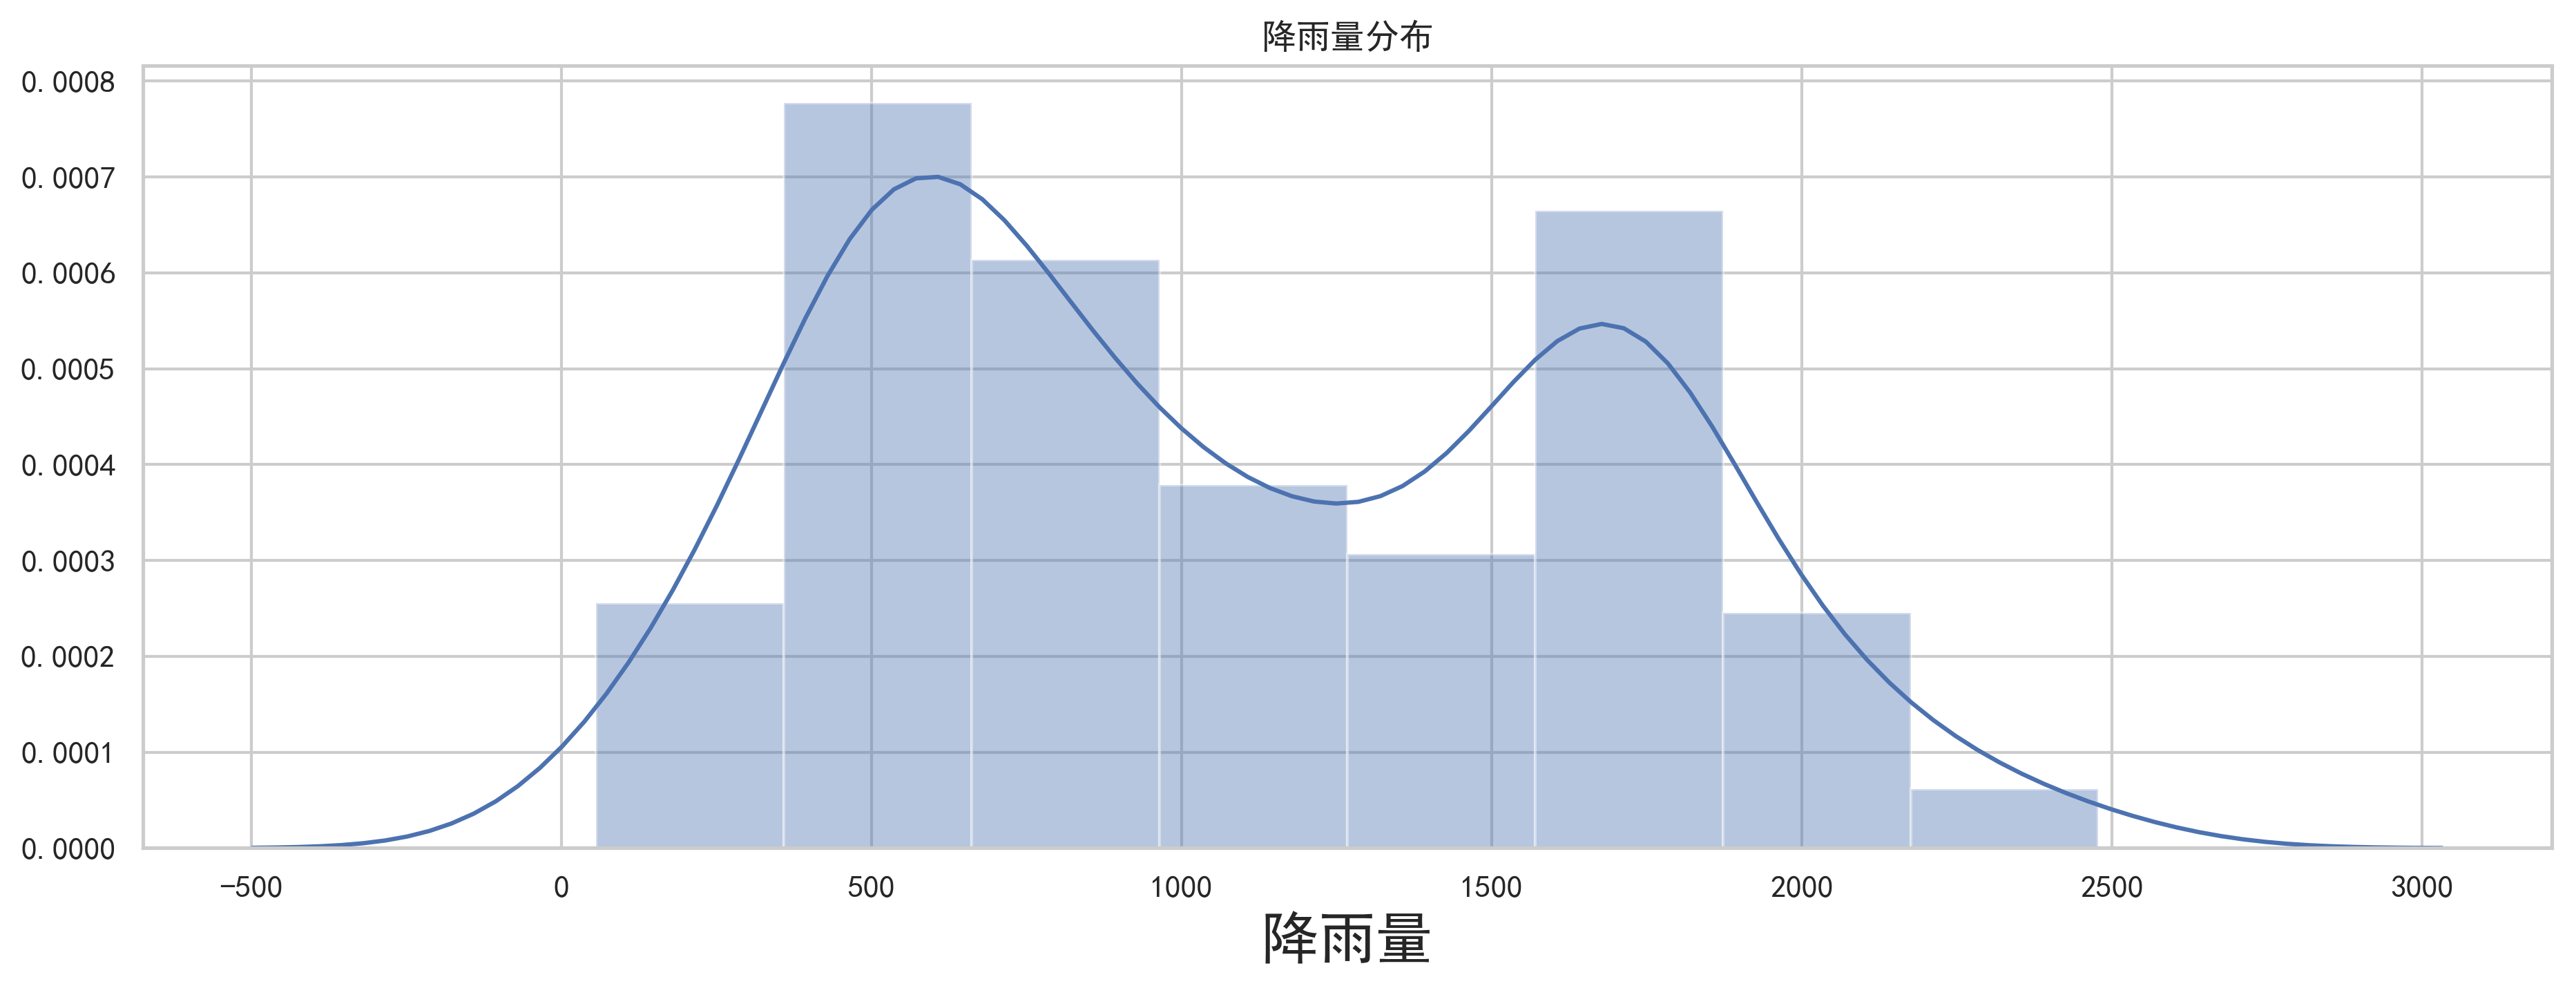

In [177]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
f,ax =plt.subplots(figsize=(15,5),dpi=300)
#data.info()
print(data['Precipitation'].skew())
sns.distplot(data['Precipitation'].dropna())
ax.set_title('降雨量分布')
ax.set_xlabel('降雨量',fontsize=20)

In [107]:
data.describe()

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
count,325.000000,321.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,75.809231,1081.337695,2390.901815,15.980149,113.990609,31.870665,380.141846,2610.883077,0.246154,38.347969,52.315108
std,43.610516,586.887180,3254.876921,5.016133,7.688515,6.093703,741.409703,2910.679547,0.431433,6.319706,91.707838
min,12.000000,56.100000,22.500000,-2.500000,80.105800,18.234043,-12.000000,1.000000,0.000000,7.600000,1.530000
25%,45.000000,574.400000,762.970000,13.727397,111.130000,27.695387,18.000000,721.000000,0.000000,35.530000,18.890000
50%,69.000000,920.000000,1328.520000,16.494521,115.500183,31.385597,62.000000,1790.000000,0.000000,38.690000,24.000000
75%,102.000000,1651.500000,2735.340000,18.921918,119.823308,36.449432,354.000000,3517.000000,0.000000,42.620000,37.630000
max,296.000000,2478.100000,24964.990000,27.447945,129.598496,49.220000,4505.000000,25900.000000,1.000000,76.490000,686.670000


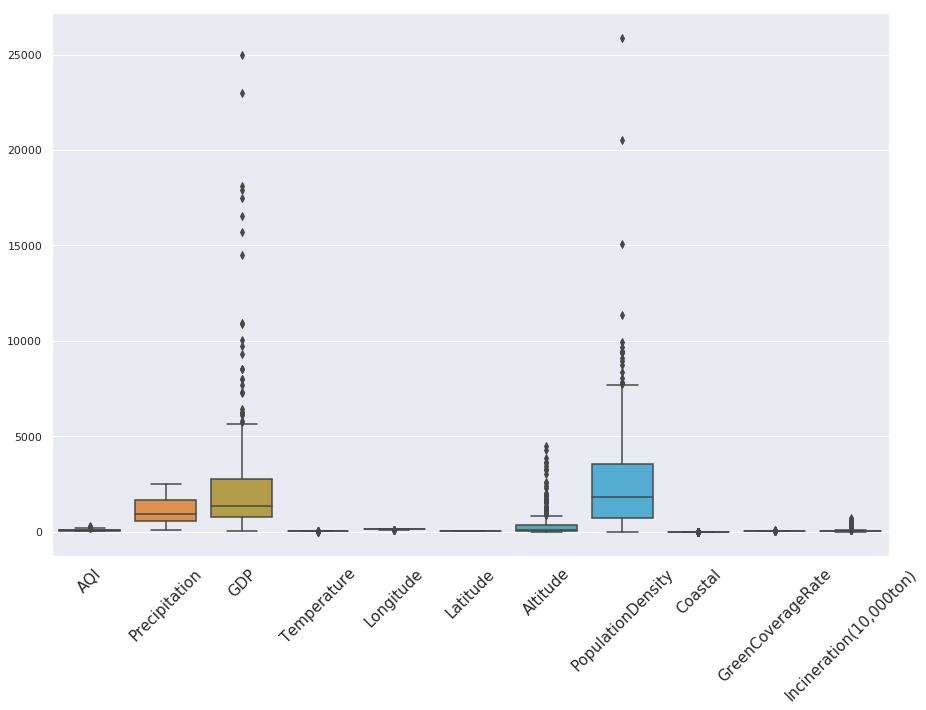

In [108]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =45,fontsize=15)
sns.boxplot(data=data)

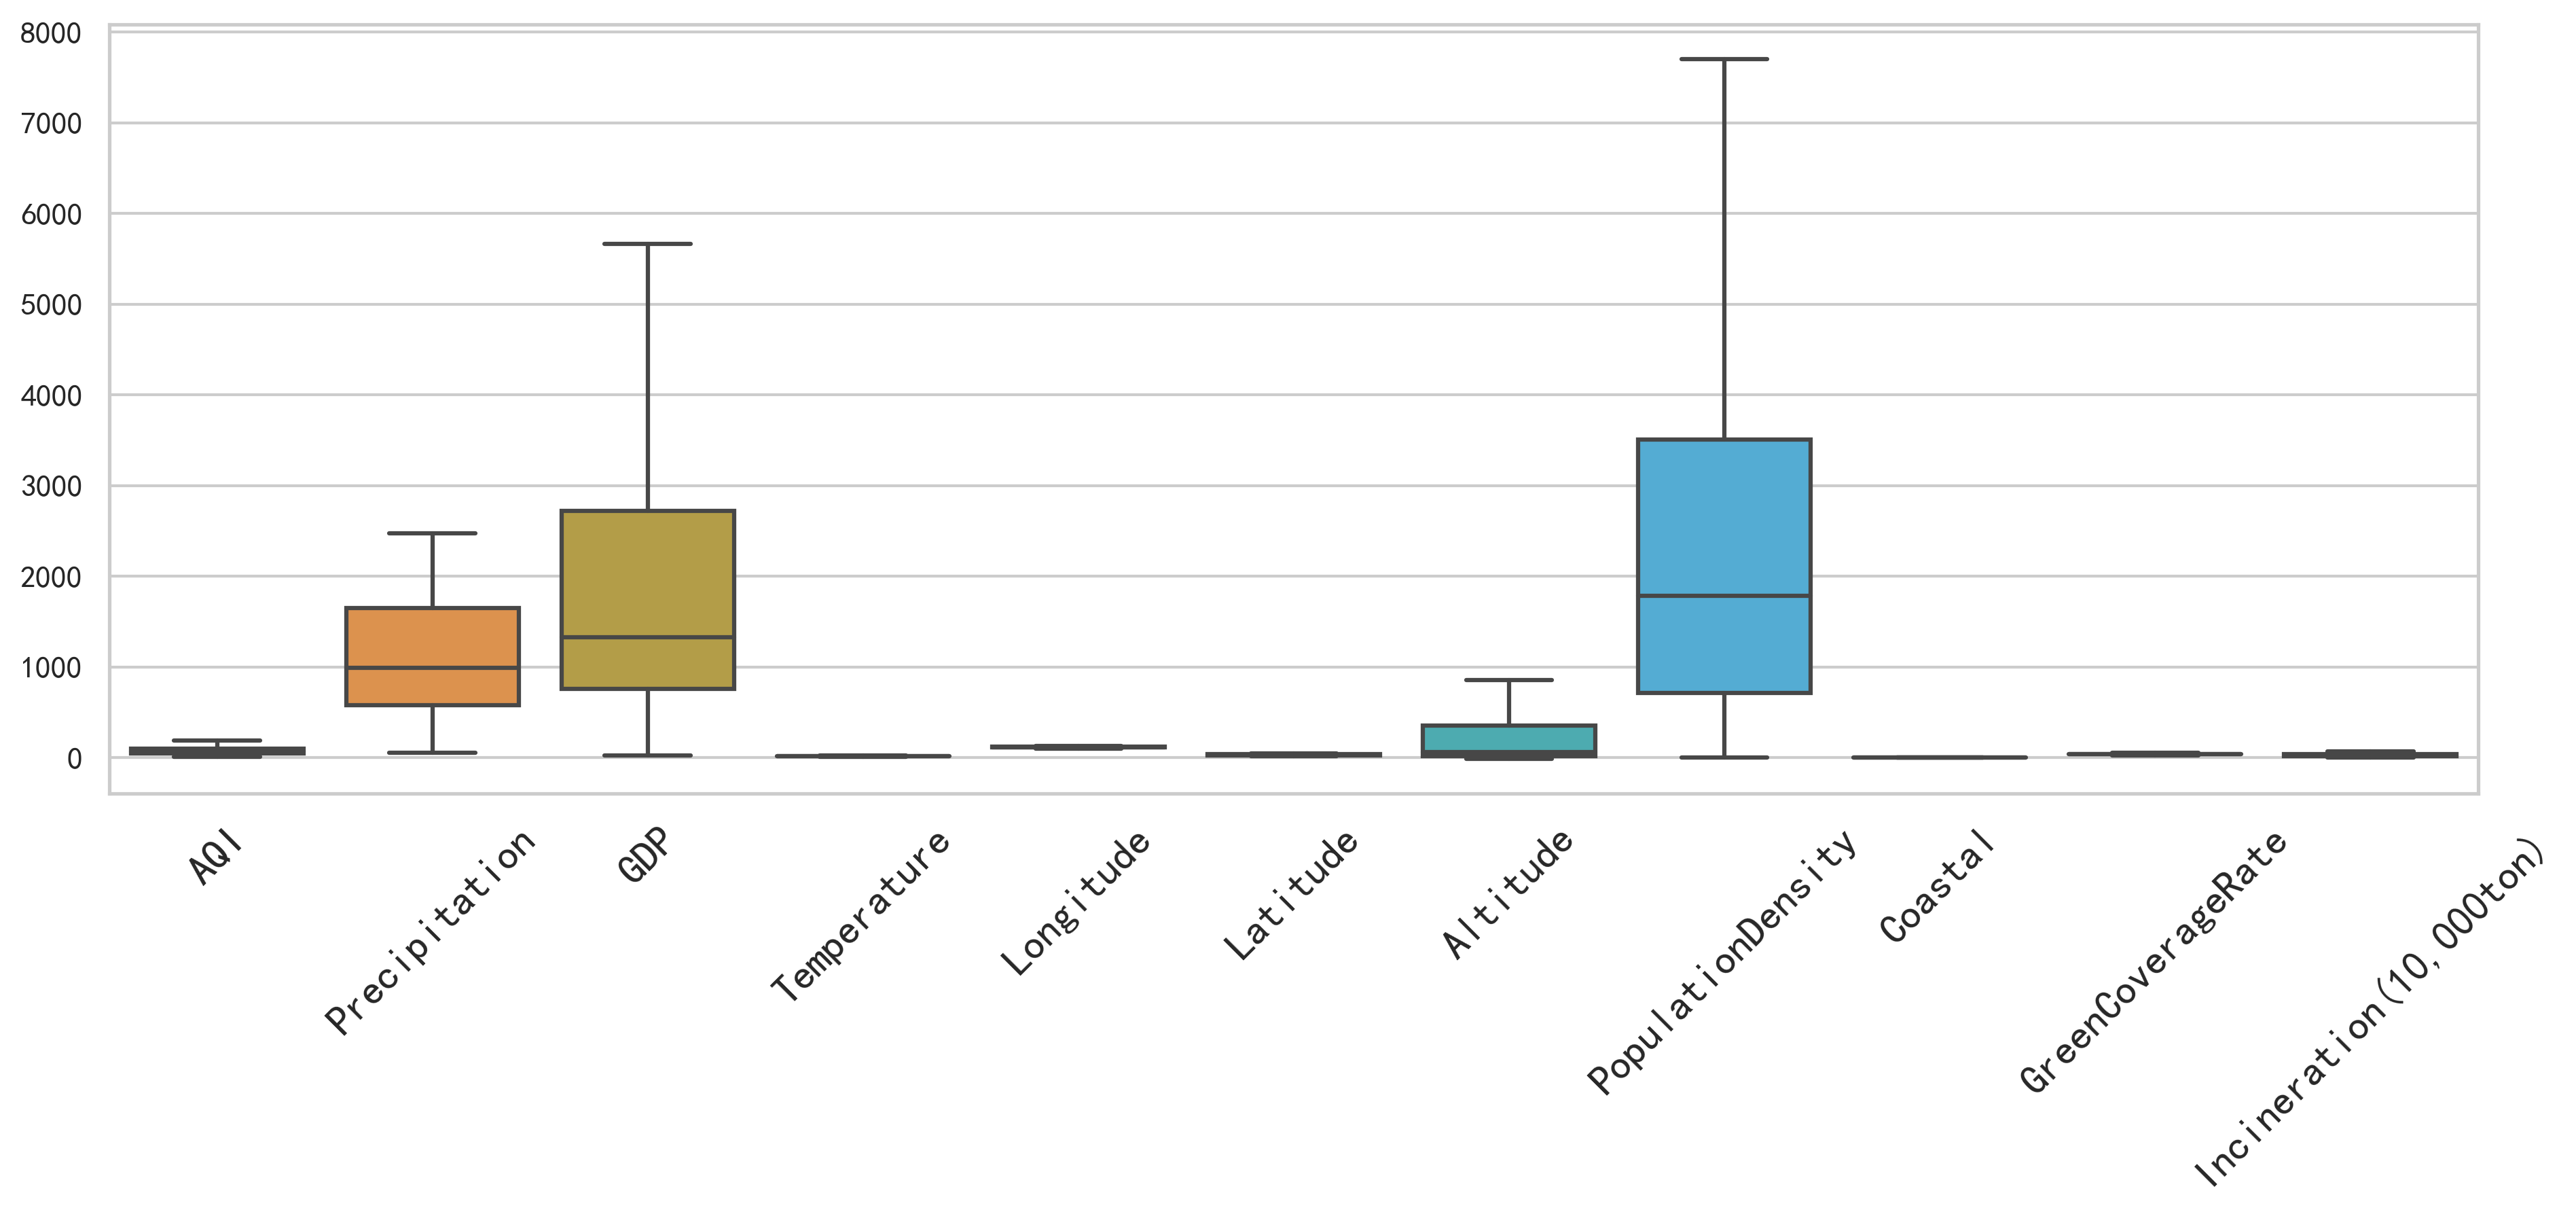

In [167]:
t=data.copy()
for k in t:
    if pd.api.types.is_numeric_dtype(t[k]):
        o = t[k].describe()
        IQR = o['75%'] - o['25%']
        lower =o['25%'] - 1.5*IQR
        upper =o['75%'] +1.5*IQR
        t[k][t[k] < lower] = lower
        t[k][t[k] > upper] = upper

plt.figure(figsize=(15,5),dpi=300)
plt.xticks(rotation =45,fontsize=15)
sns.boxplot(data=t)

In [111]:
print('重复的行数：',data.duplicated().sum())
data.drop_duplicates(inplace=True)

重复的行数： 2


,City,AQI
204,Shaoguan City,12
163,Nanping City,12
154,Meizhou City,12
91,Keelung City,13
195,Sanming City,13


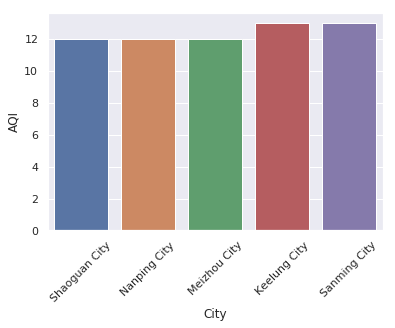

In [112]:
t = data[['City','AQI']].sort_values('AQI')
display(t.iloc[:5])
plt.xticks(rotation = 45 )
sns.barplot(x ='City',y='AQI',data =t.iloc[:5])

二级    136
一级    103
三级     66
四级     14
五级      3
六级      1
Name: AQI, dtype: int64

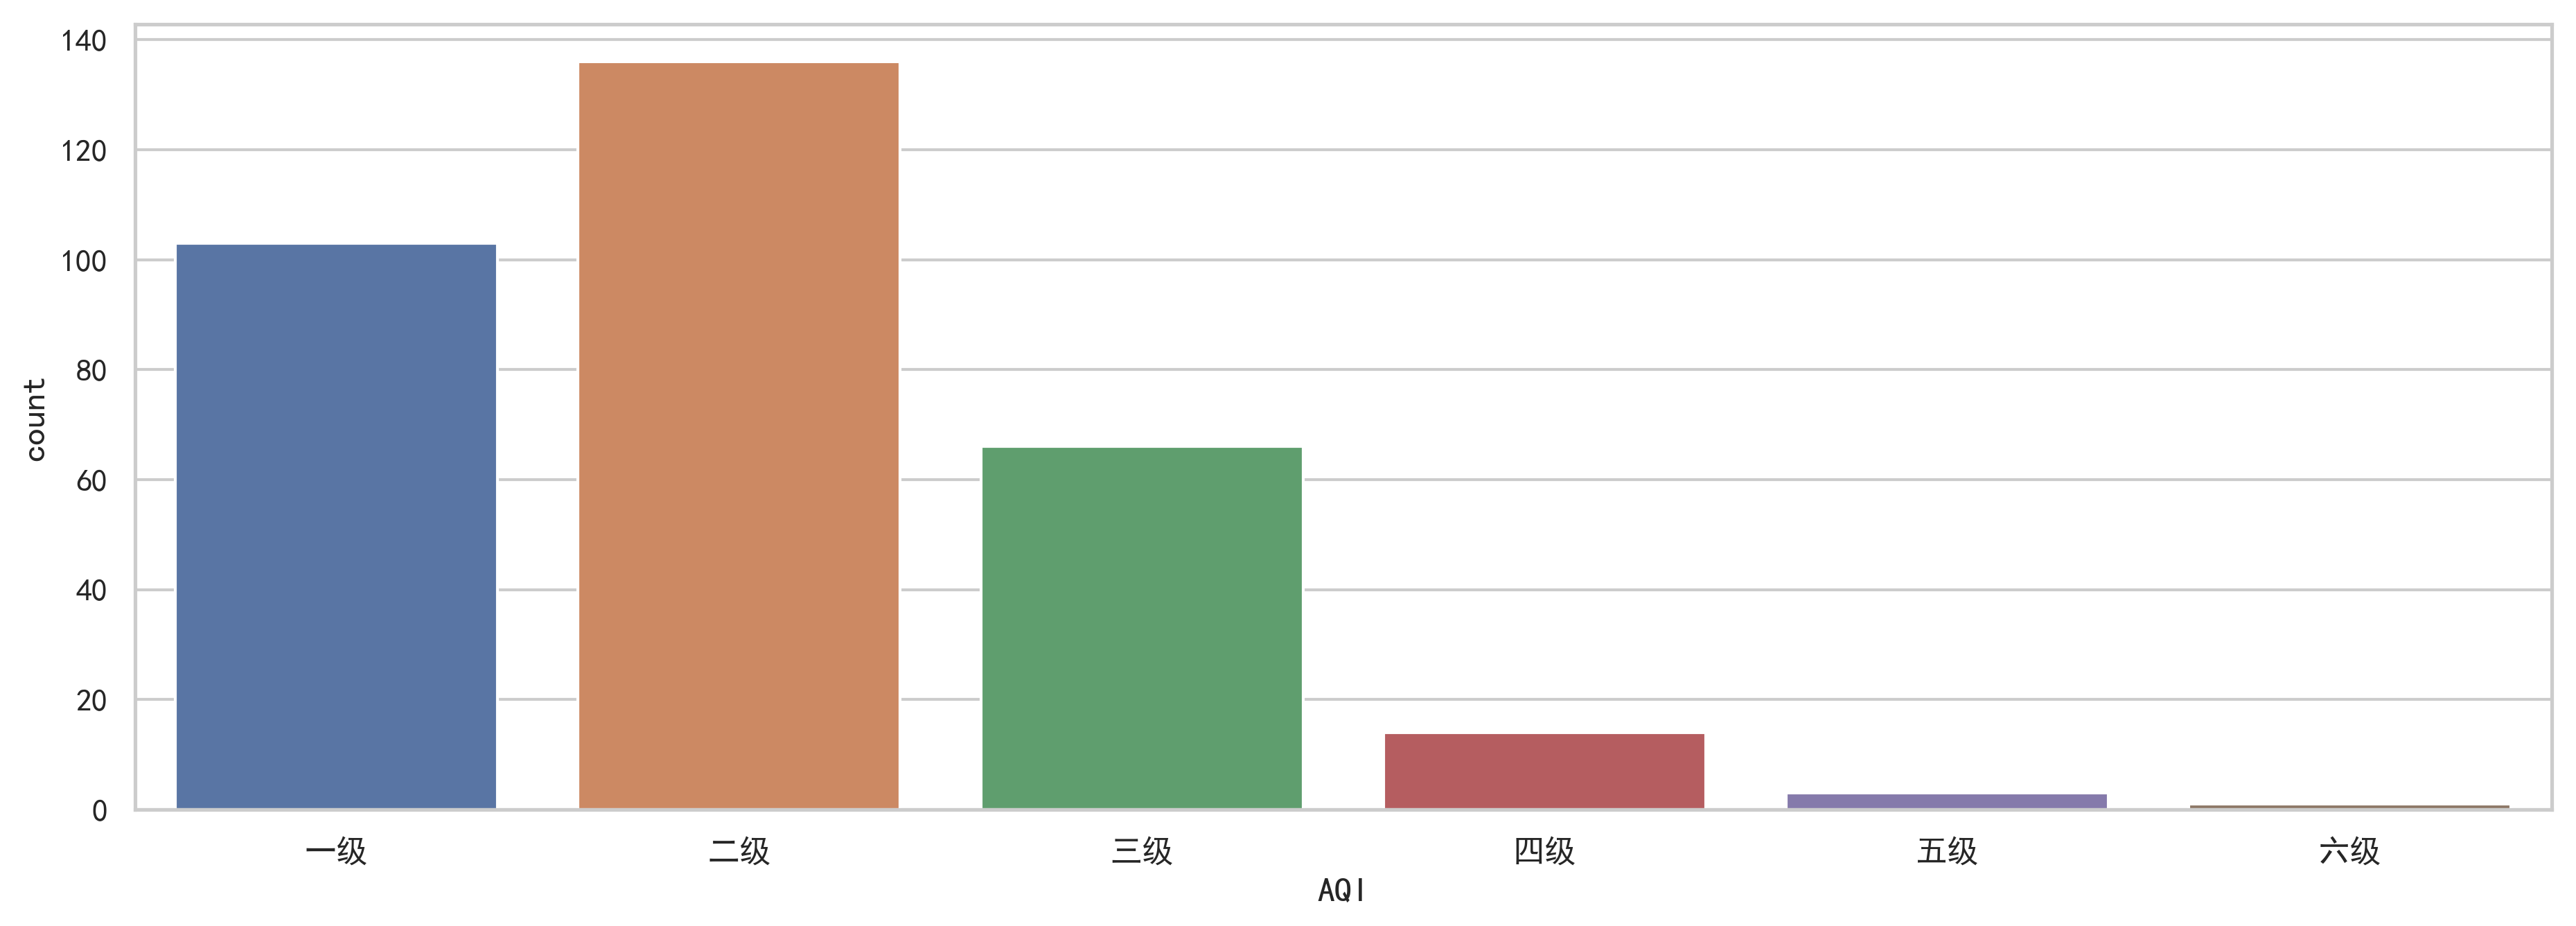

In [165]:
def value_to_level(AQI):
    if AQI >0 and AQI <=50:
        return '一级'
    elif AQI >=51 and AQI <=100:
        return '二级'
    elif AQI >=101 and AQI <=150:
        return '三级'
    elif AQI >=150 and AQI <=200:
        return '四级'
    elif AQI >=200 and AQI <=250:
        return '五级'
    else:
        return '六级'
level = data['AQI'].apply(value_to_level)
display(level.value_counts())
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
pyplot.figure(figsize=(15, 5),dpi=300) # width and height in inches
#plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.countplot(x=level,order=['一级','二级','三级','四级','五级','六级'])

In [114]:
data

,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48
...,...,...,...,...,...,...,...,...,...,...,...,...
320,Zhumadian City,79,1388.0,1807.09,15.946575,114.035690,32.979042,84.0,2539,0,39.46,18.86
321,Ziyang City,86,807.8,1270.40,16.182192,104.650190,30.122671,367.0,1787,0,38.67,18.28
322,Zibo City,116,288.0,4130.20,14.576712,118.056053,36.793579,38.0,782,0,36.00,31.00
323,Zigong City,118,994.8,1143.11,19.432877,104.776352,29.367722,311.0,1557,0,40.20,35.47


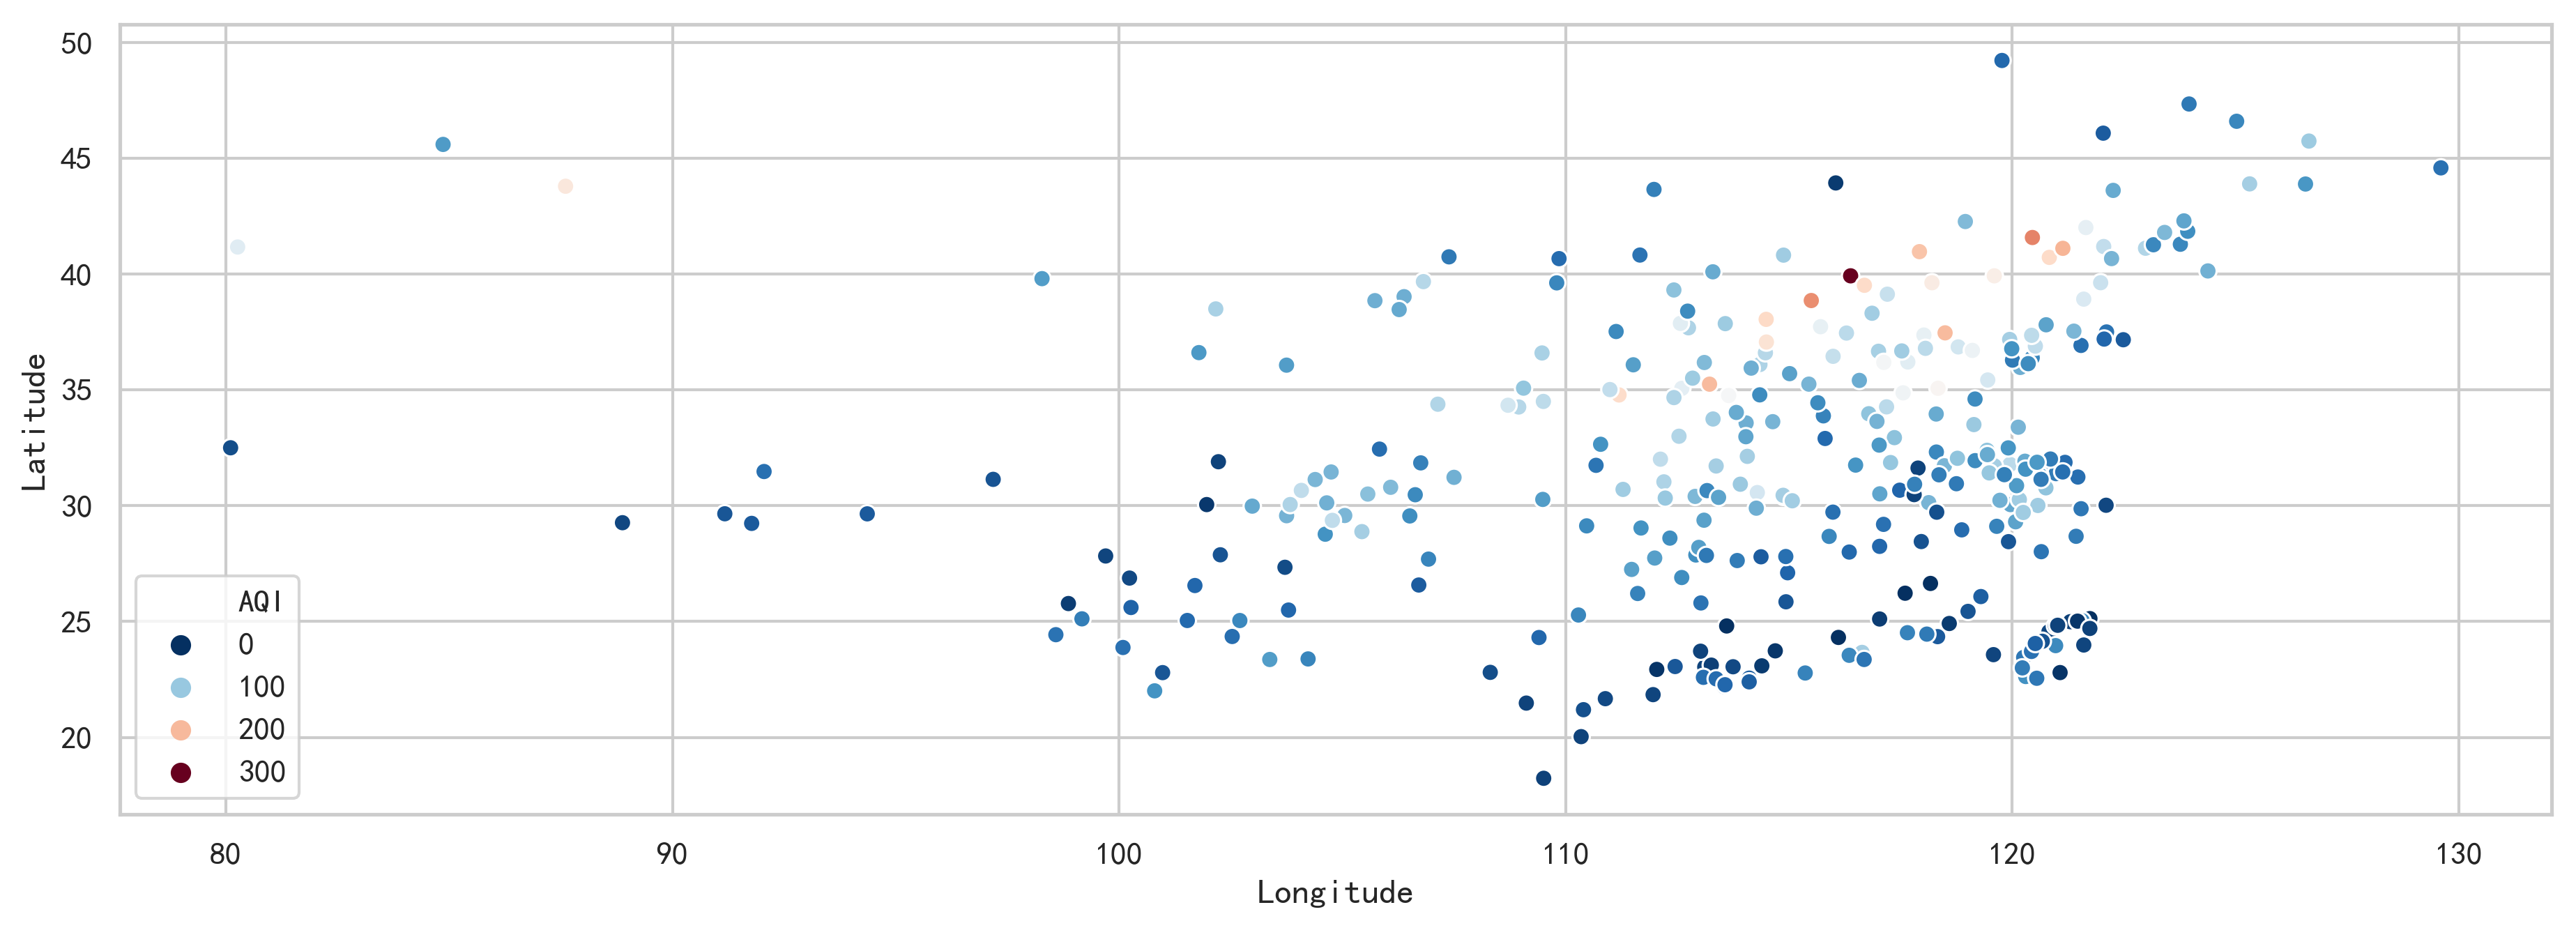

In [164]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 5),dpi=300) # width and height in inches
#plt.figure(figsize =(15,8))
sns.scatterplot(x='Longitude',y='Latitude',hue = 'AQI',palette=plt.cm.RdBu_r,data = data)

In [116]:
#list(   (  df.iloc[i]['City'], df.iloc[i]['AQI'] )  for i in range(len(df))) 

样本均值： 28.712983069663117
样本均方差： 10.082213096353591
偏度： -0.14398314841910867


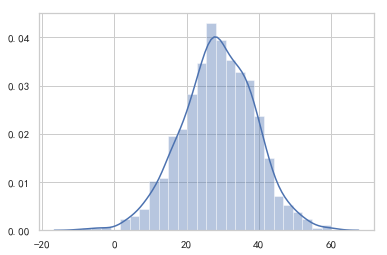

In [117]:
all_ = np.random.normal(loc=30,scale=80,size=10000)
mean_arr = np.zeros(1000)
for i in range(len(mean_arr)):
    mean_arr[i] = np.random.choice(all_,size =64,replace=False).mean()
print('样本均值：',mean_arr.mean())
print('样本均方差：',mean_arr.std())
print('偏度：',pd.Series(mean_arr).skew())
sns.distplot(mean_arr)

In [118]:
# 定义标准差
from scipy import stats
scale =50
x = np.random.normal(0,scale,size=100000)
for times in range(1,4):
    y=x[(x >= -times*scale) & (x <= times*scale)]
    print(f'{times}倍标准差：')
    print(f'{len(y) * 100 /len(x)}%')
    
r = stats.ttest_1samp(data['AQI'],75)
print('t值：', r.statistic)
print('p值：', r.pvalue)

1倍标准差：
68.441%
2倍标准差：
95.55%
3倍标准差：
99.732%
t值： 0.1397645790492617
p值： 0.8889333799013008


根据中心极限定理，如果多次抽样，则样本均值构成的正态分布。如果我们对总体进行一次抽样，则本次抽样个体的均值有95%的概率会在二倍标准差内，仅仅有的5% 的概率会在二倍标准差之外。根据小概率事件（很小的概率在一次抽样中基本不会发生），

如果抽样的个体均值落在标准之外，我们就可以认为，本次抽样来自总体，**该总体的均值并非我们所期望的均值**

In [144]:
n = len(data)
df = n-1
left = stats.t.ppf(0.025,df=df)
right = stats.t.ppf(0.974,df =df)
print(left,right)
mean = data['AQI'].mean()
print('均值为：',mean)
std= data['AQI'].std()
mean + left *(std/np.sqrt(n)),mean+right*(std/np.sqrt(n))

-1.9673585853224684 1.9503650549451497
均值为： 75.3343653250774


(70.6277615675309, 80.0003146668379)

In [120]:
mean

75.3343653250774

### 因此我们计算出的全国所有城市平均空气质量所在的置信区间，大致在70-80之间  置信度为 95%
可以看出， P值大于0.05，**所以在显著水平为0.05检验下，我们无法拒绝原假设，因此接受原假设**


In [121]:
data.head(3)

,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.22465,31.89941,2617.0,11,0,36.00,23.0
1,Aksu City,137,80.4,610.00,12.276712,80.26338,41.16754,1108.0,6547,0,33.94,23.0
2,Alxa League,85,150.0,322.58,24.200000,105.72895,38.85192,1673.0,1,0,36.00,23.0


Coastal
0    79.045267
1    64.062500
Name: AQI, dtype: float64

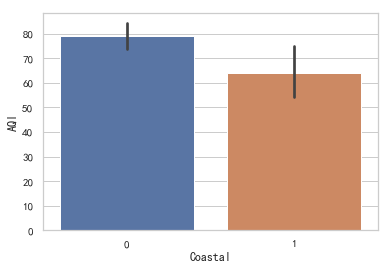

In [122]:
display(data.groupby('Coastal')['AQI'].mean())
sns.barplot(x='Coastal',y='AQI',data=data)

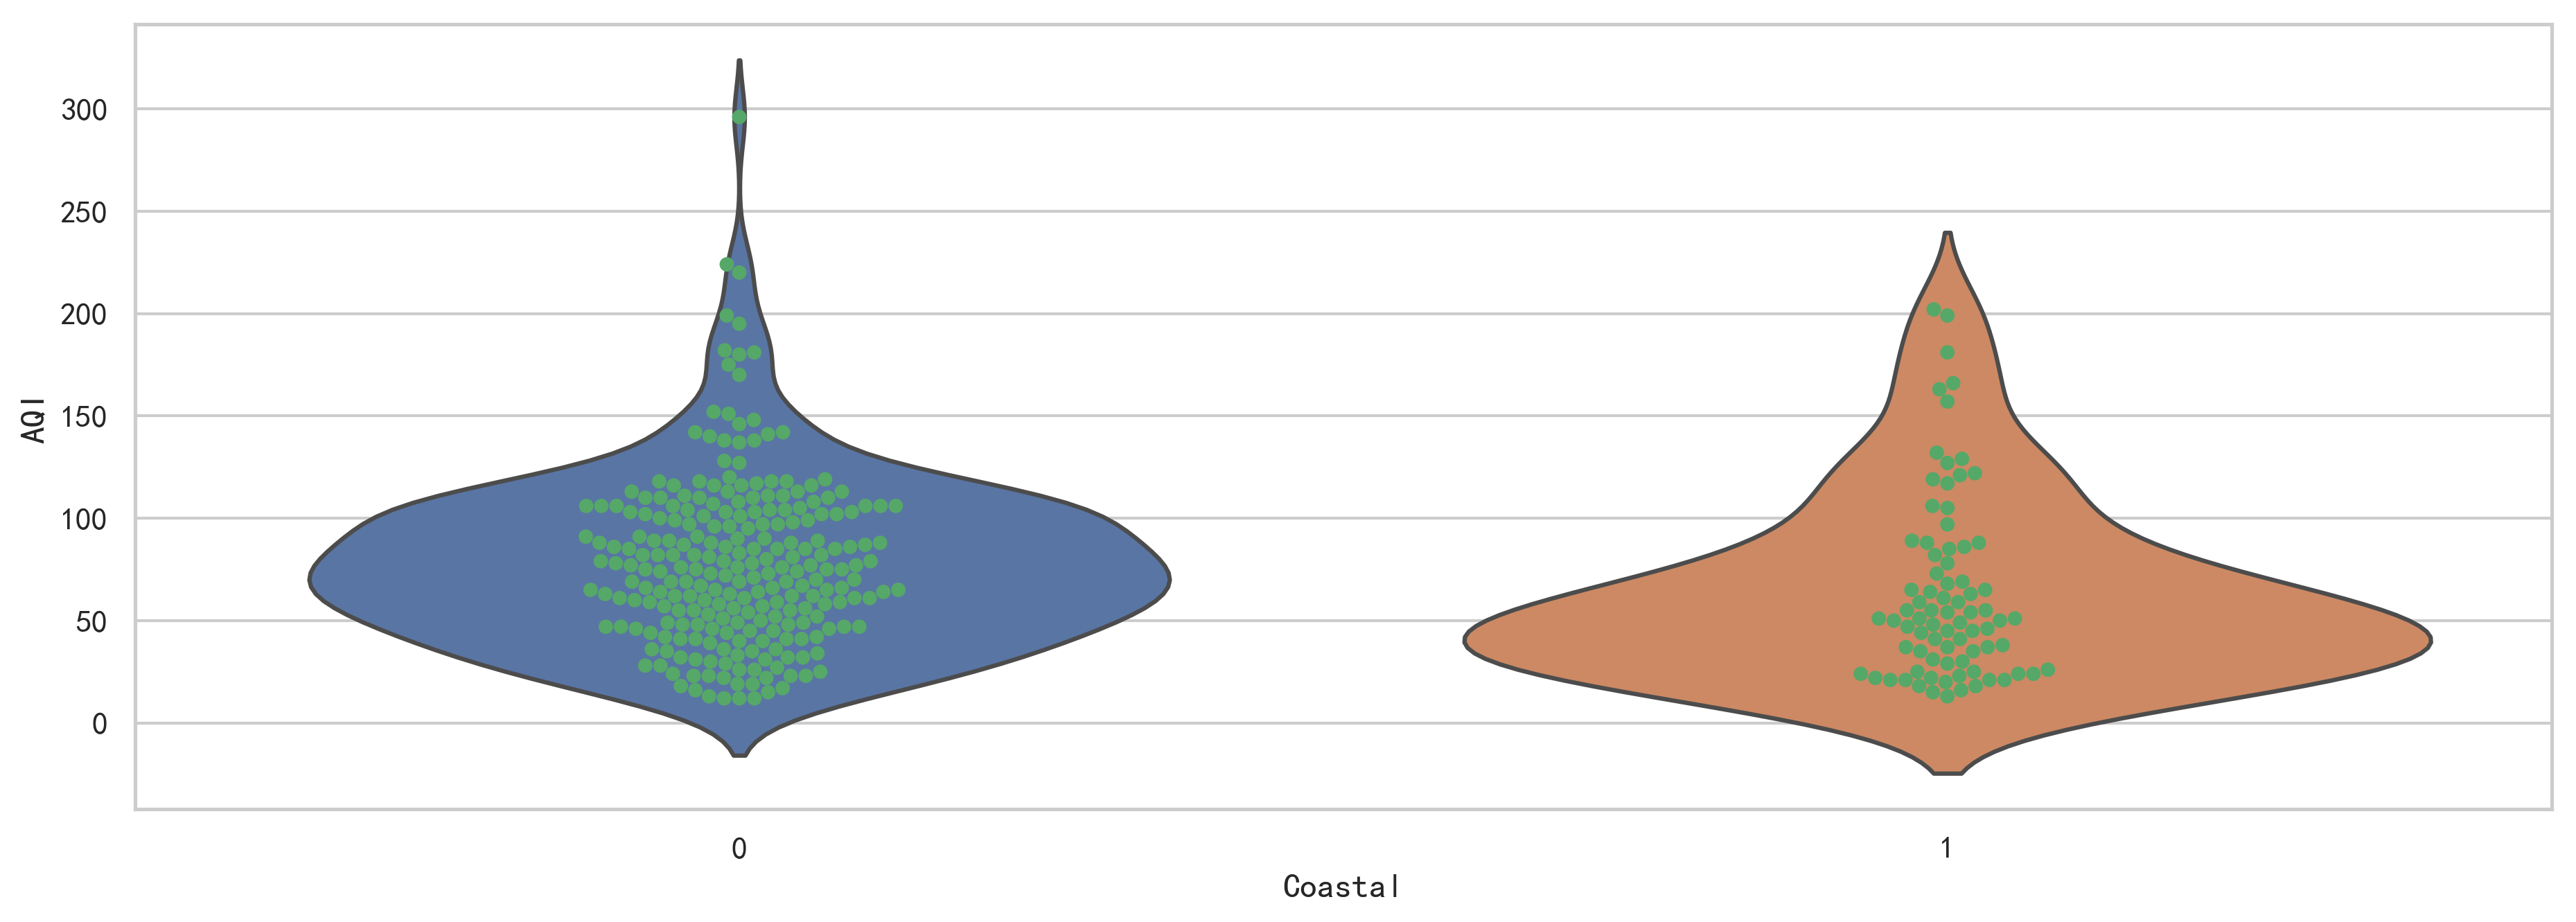

In [163]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 5),dpi=300) # width and height in inches
sns.violinplot(x='Coastal',y='AQI',data = data,inner =None)
sns.swarmplot(x='Coastal',y='AQI',color ='g', data=data)

In [124]:
coastal = data[data['Coastal']==1]['AQI']
inland = data[data['Coastal']==0]['AQI']
stats.levene(coastal,inland)

LeveneResult(statistic=0.08825036641952543, pvalue=0.7666054880248168)

In [125]:
stats.ttest_ind(coastal,inland,equal_var= True)

Ttest_indResult(statistic=-2.7303827520948905, pvalue=0.006675422541012958)

In [126]:
data.corr()

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
AQI,1.000000,-0.402550,0.160341,-0.283956,0.093900,0.552652,-0.204753,-0.026496,-0.150656,-0.097734,0.106898
Precipitation,-0.402550,1.000000,0.175885,0.686268,0.226305,-0.657071,-0.326277,0.069223,0.261562,0.155570,0.200485
GDP,0.160341,0.175885,1.000000,0.145780,0.173041,-0.010124,-0.208952,0.229402,0.174241,-0.039220,0.899550
Temperature,-0.283956,0.686268,0.145780,1.000000,0.141277,-0.807119,-0.459426,0.144923,0.305894,0.216575,0.173590
Longitude,0.093900,0.226305,0.173041,0.141277,1.000000,0.173585,-0.737548,-0.121986,0.374889,0.156439,0.072068
Latitude,0.552652,-0.657071,-0.010124,-0.807119,0.173585,1.000000,0.002571,-0.167384,-0.204199,-0.142776,-0.081412
Altitude,-0.204753,-0.326277,-0.208952,-0.459426,-0.737548,0.002571,1.000000,-0.031408,-0.271570,-0.182449,-0.122192
PopulationDensity,-0.026496,0.069223,0.229402,0.144923,-0.121986,-0.167384,-0.031408,1.000000,-0.034158,0.021197,0.283563
Coastal,-0.150656,0.261562,0.174241,0.305894,0.374889,-0.204199,-0.271570,-0.034158,1.000000,0.264419,0.158850
GreenCoverageRate,-0.097734,0.155570,-0.039220,0.216575,0.156439,-0.142776,-0.182449,0.021197,0.264419,1.000000,-0.029088


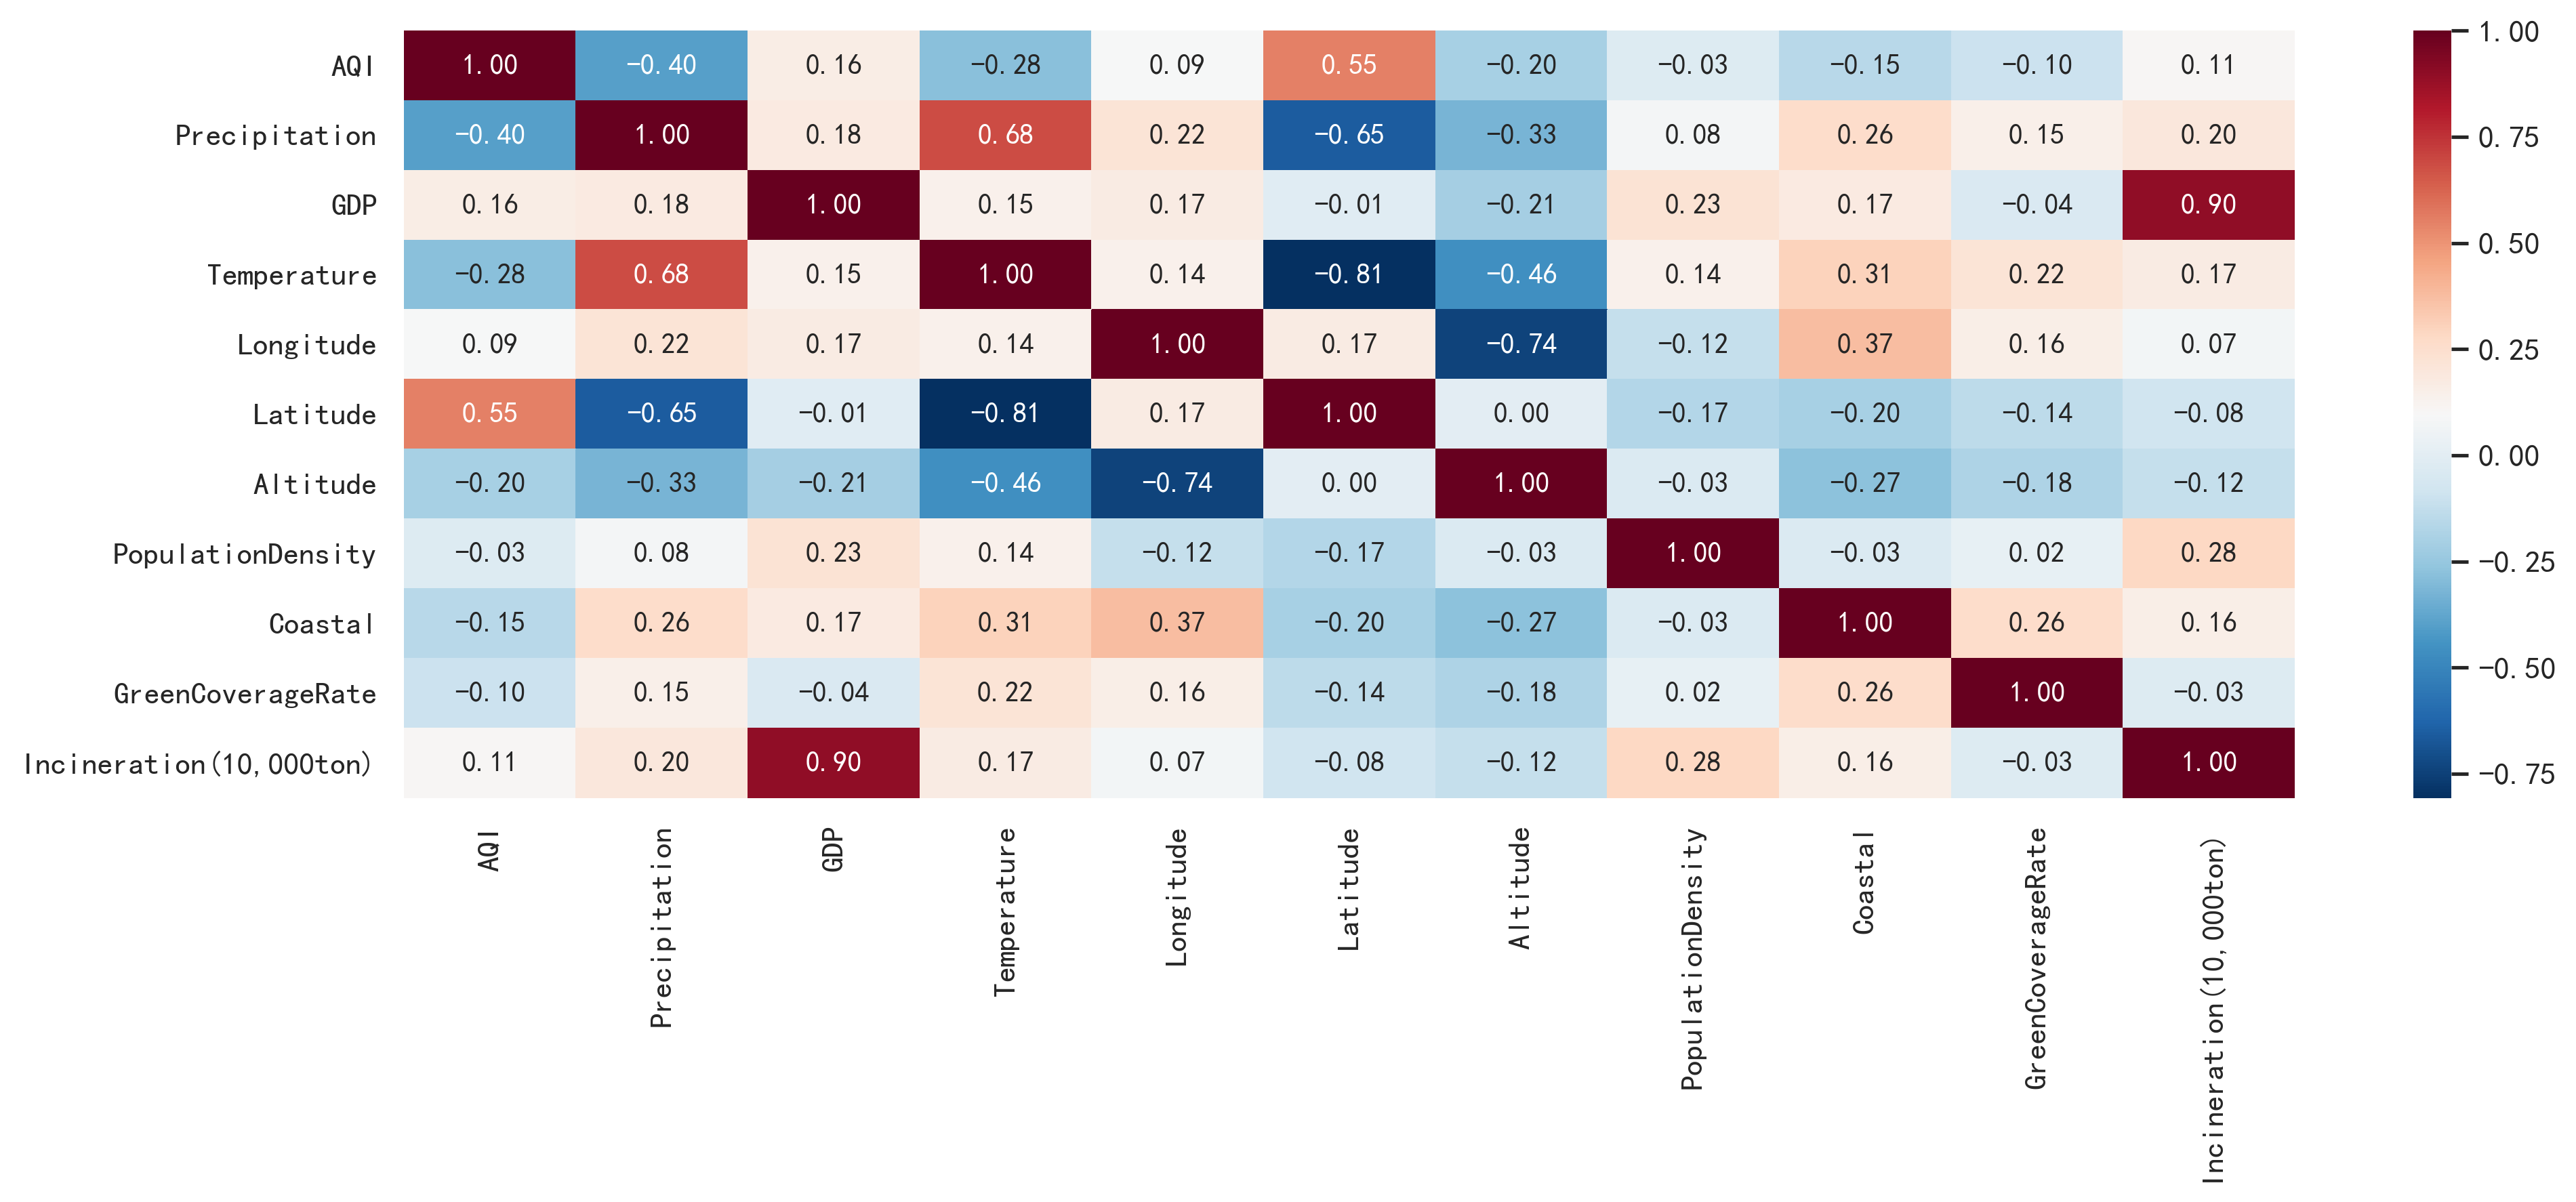

In [160]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 5),dpi=300) # width and height in inches
#plt.figure(figsize =(15,8))
sns.heatmap(data.corr(),cmap = plt.cm.RdBu_r,annot =True ,fmt = '.2f')

In [133]:
data =data.fillna(method='ffill')

0.47025187914599453
0.3026223610857963


Text(0.5, 1.0, '预测回归')

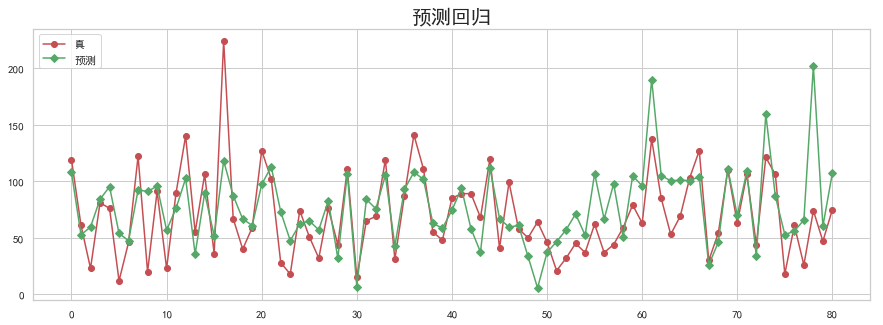

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.drop(['City','AQI'],axis = 1)
y = data['AQI']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
plt.figure(figsize=(15,5))
plt.plot(y_test.values,'-r',label='真', marker='o')
plt.plot(y_hat,'-g',label='预测', marker='D')
plt.legend()
plt.title('预测回归',fontsize=20)

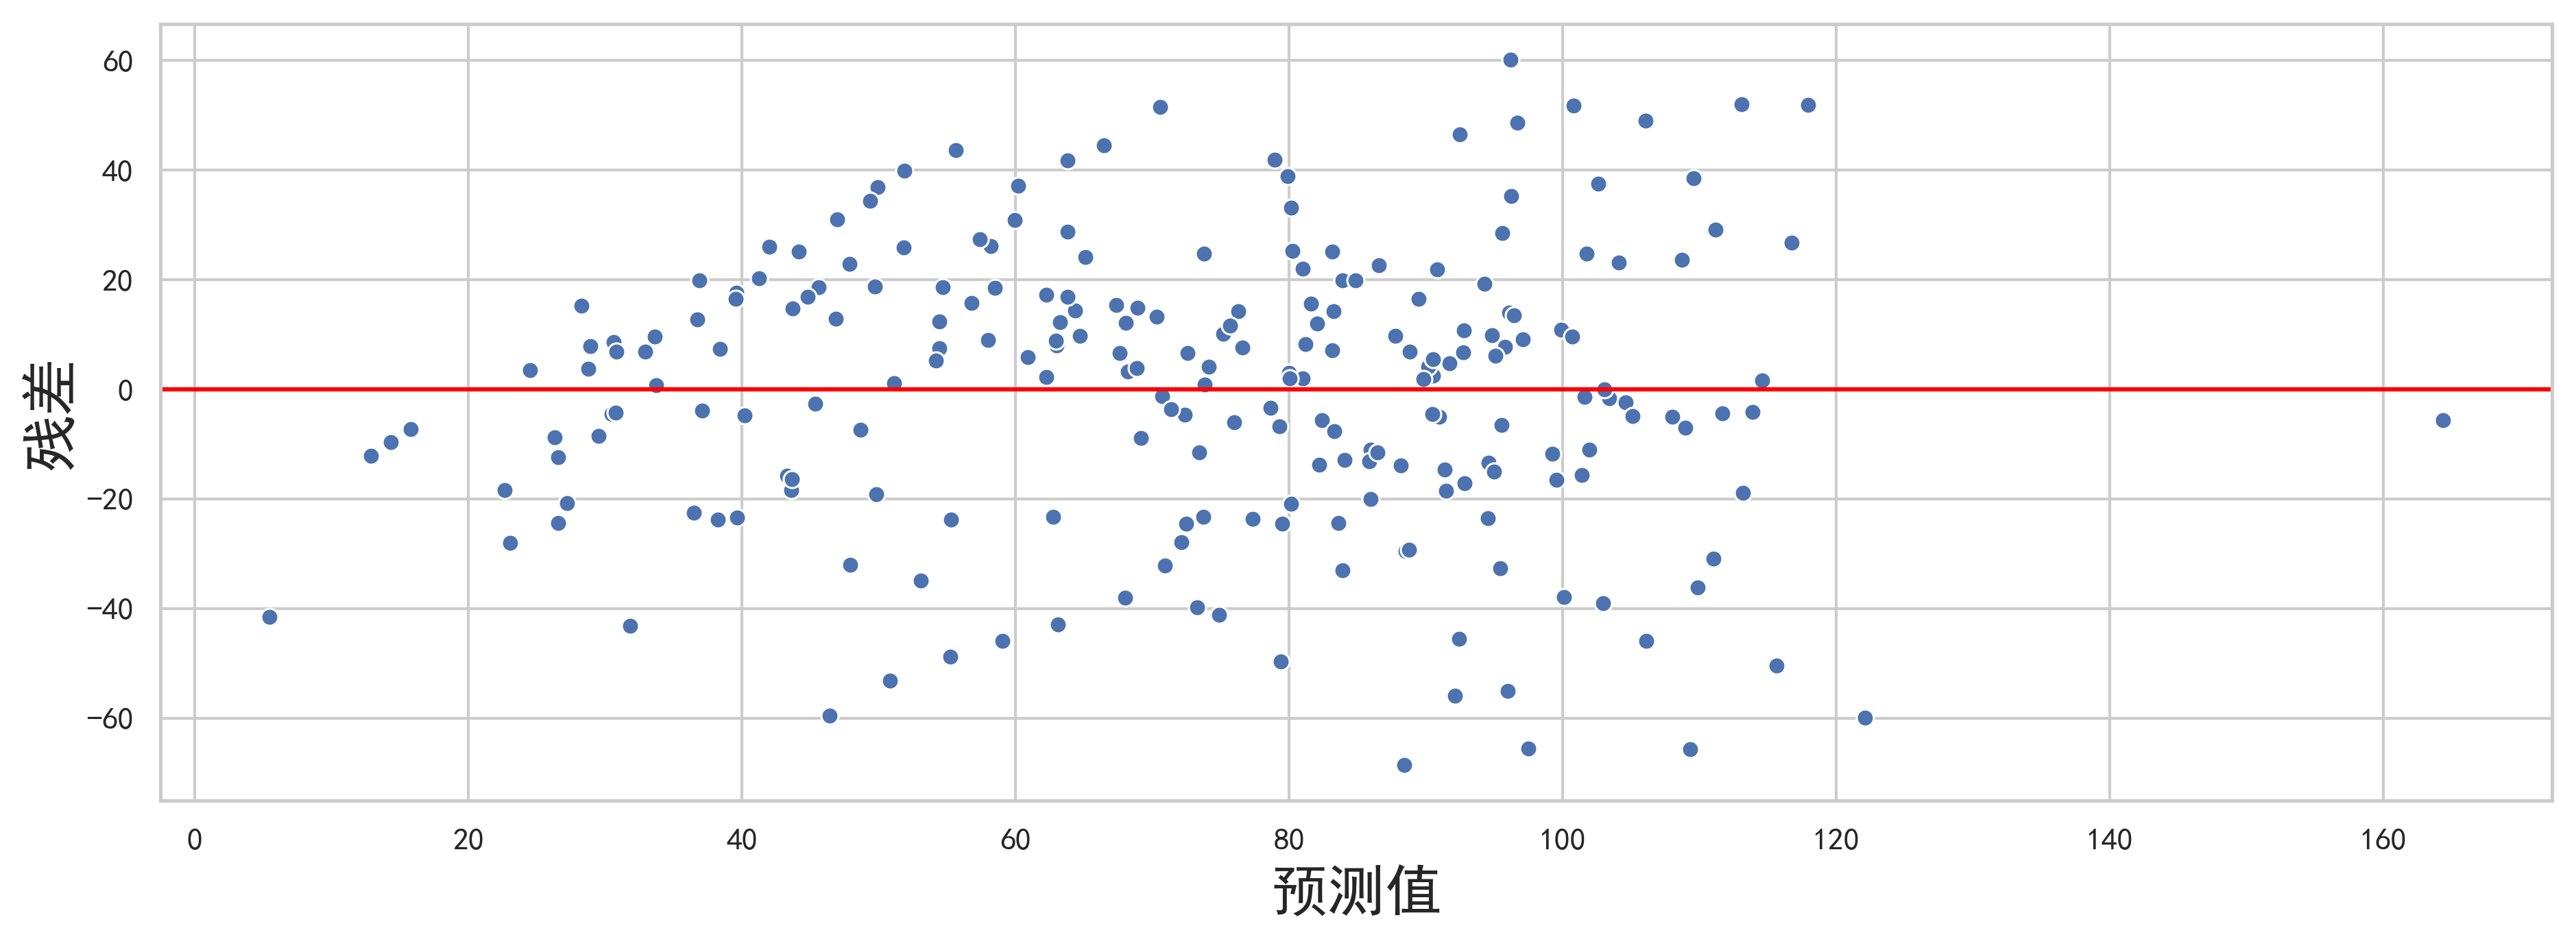

In [153]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 5),dpi=300) # width and height in inches
y_hat_train = lr.predict(X_train)
residual = y_hat_train - y_train.values
plt.xlabel('预测值',fontsize=20)
plt.ylabel('残差',fontsize=20)
plt.axhline(y=0,color='red')
sns.scatterplot(x=y_hat_train,y=residual)


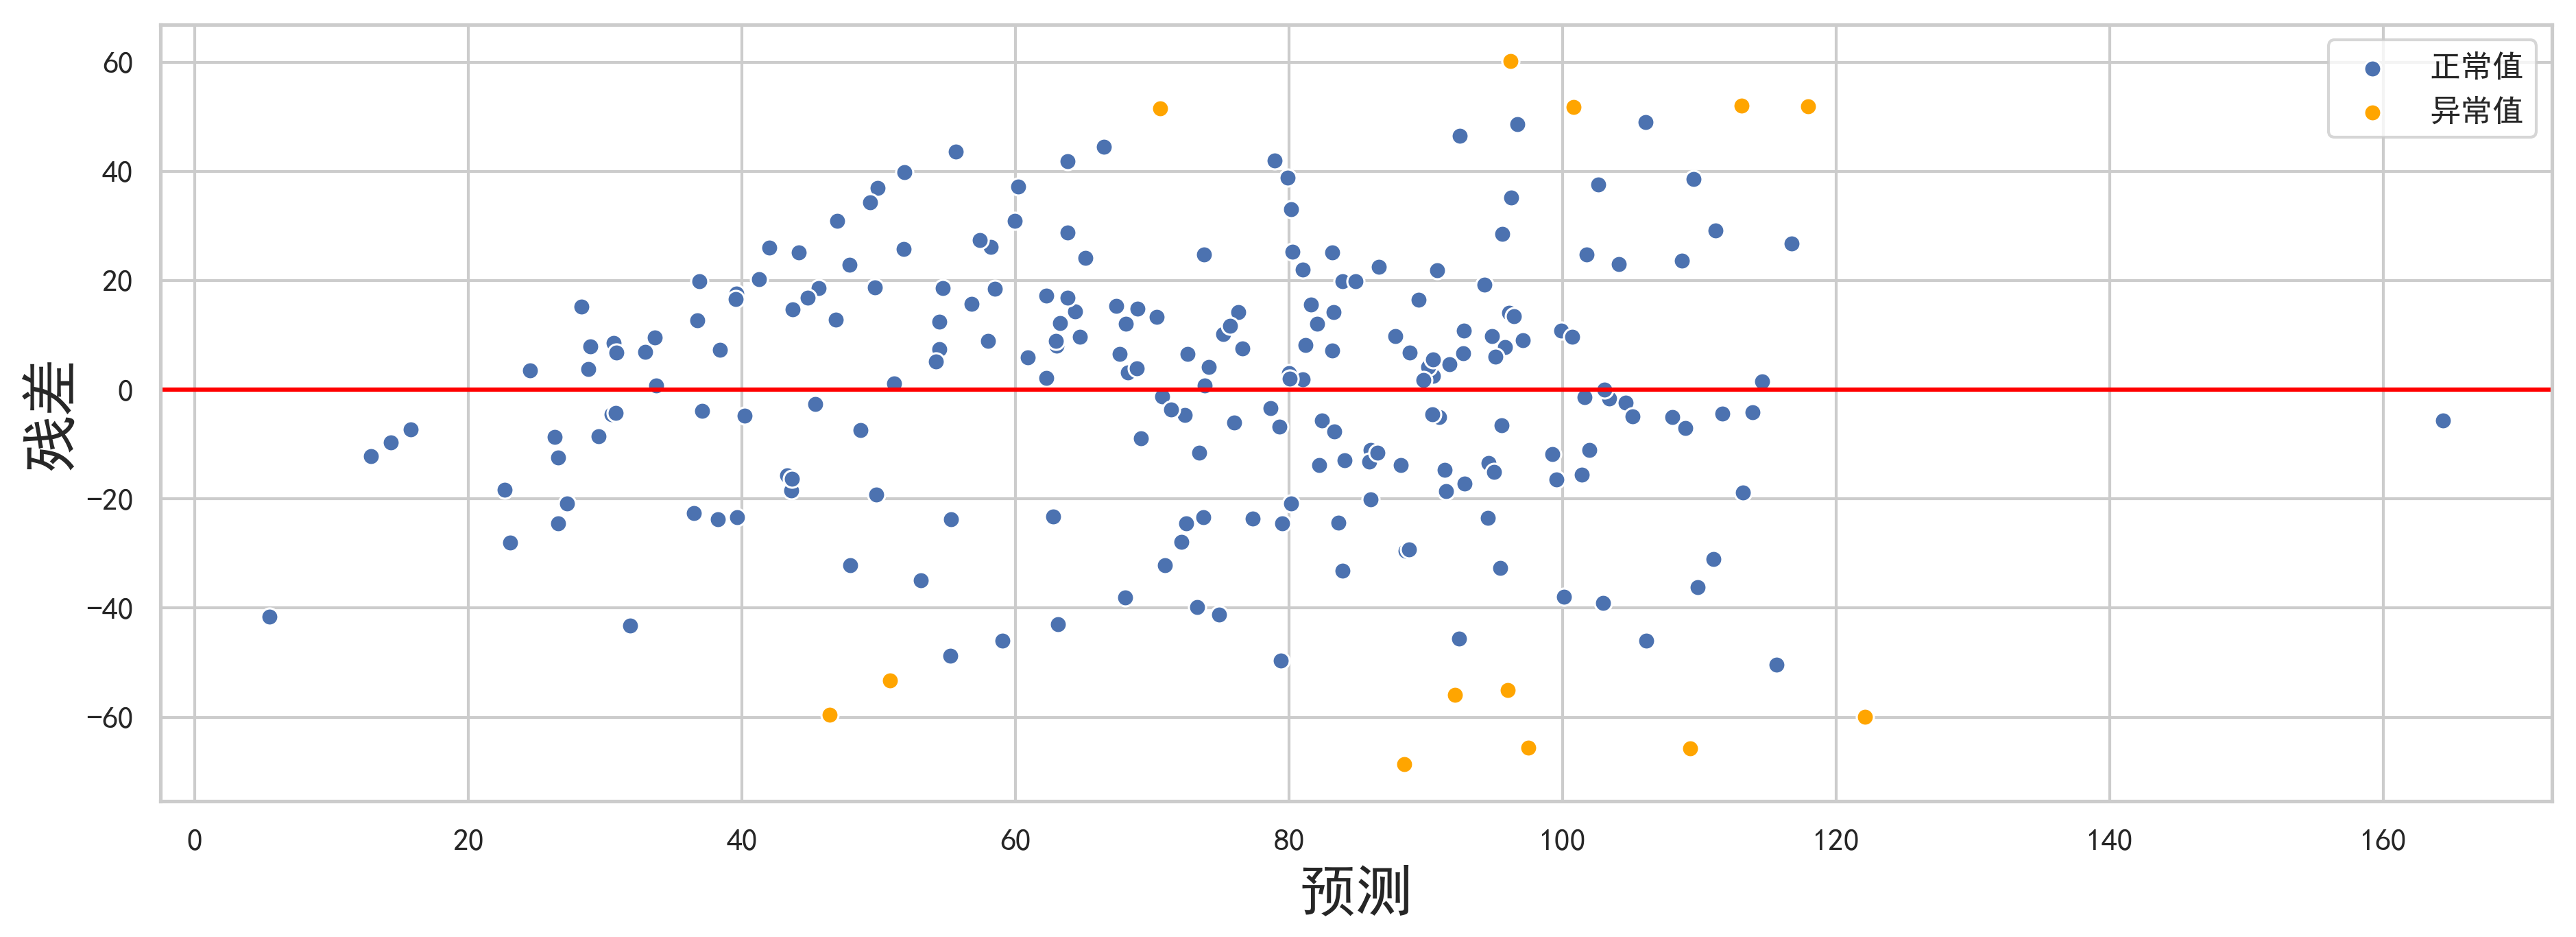

In [152]:
pyplot.figure(figsize=(15, 5),dpi=300) # width and height in inches
r = (residual - residual.mean())/residual.std()
y_hat_train[np.abs(r) >2]
plt.xlabel('预测',fontsize=20 )
plt.ylabel('残差',fontsize=20)
plt.axhline(y=0,color='red')
sns.scatterplot(x=y_hat_train[np.abs(r)<=2],y=residual[np.abs(r)<=2],color = 'b',label='正常值')
sns.scatterplot(x=y_hat_train[np.abs(r)>2],y=residual[np.abs(r)>2],color = 'orange',label='异常值')

In [155]:
X_train= X_train[np.abs(r)<=2]
y_train =y_train[np.abs(r)<=2]

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('训练集得分',lr.score(X_train,y_train))
print('测试集得分',lr.score(X_test,y_test))

训练集得分 0.5880618707297794
测试集得分 0.3574818275068905


训练集得分 0.947680116810593
验证集得分 0.5851971340854176


Text(0.5, 1.0, '随机森林回归')

<Figure size 4500x1500 with 0 Axes>

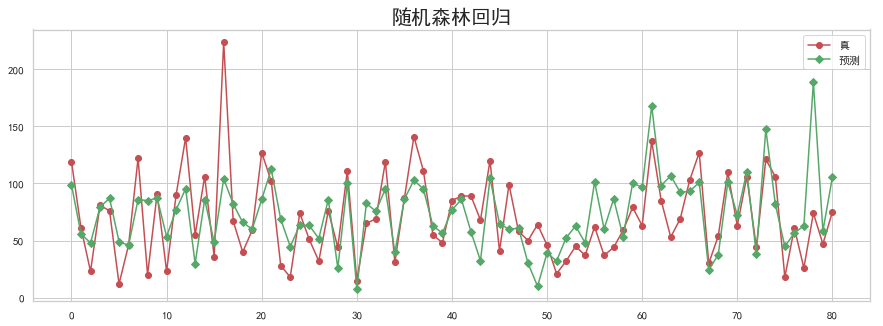

In [158]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 5),dpi=300) # width and height in inches
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,random_state=0)
rf.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('训练集得分',rf.score(X_train,y_train))
print('验证集得分',rf.score(X_test,y_test))
plt.figure(figsize=(15,5))
plt.plot(y_test.values,'-r',label='真', marker='o')
plt.plot(y_hat,'-g',label='预测', marker='D')
plt.legend()
plt.title('随机森林回归',fontsize=20)